In [10]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [4]:
penguins_df.describe

<bound method NDFrame.describe of      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0                39.1             18.7              181.0       3750.0    MALE
1                39.5             17.4              186.0       3800.0  FEMALE
2                40.3             18.0              195.0       3250.0  FEMALE
3                36.7             19.3              193.0       3450.0  FEMALE
4                39.3             20.6              190.0       3650.0    MALE
..                ...              ...                ...          ...     ...
327              47.2             13.7              214.0       4925.0  FEMALE
328              46.8             14.3              215.0       4850.0  FEMALE
329              50.4             15.7              222.0       5750.0    MALE
330              45.2             14.8              212.0       5200.0  FEMALE
331              49.9             16.1              213.0       5400.0    MALE

[332 rows x 5 col

In [5]:
penguins_df.isnull().sum().sort_values()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
penguins_df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [7]:
x = penguins_df.drop('sex' , axis=1)
y = penguins_df['sex']

In [8]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(x)

In [9]:
penguins_df.shape

(332, 5)

In [21]:
#initializing a list for inertia and a an array for k_values

inertia = []
k_values = np.arange(1,20)

In [22]:
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


c:\Users\Koko Ellally\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Koko Ellally\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Koko Ellally\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Koko Ellally\AppData\Local\Programs\Python\Python311\Li

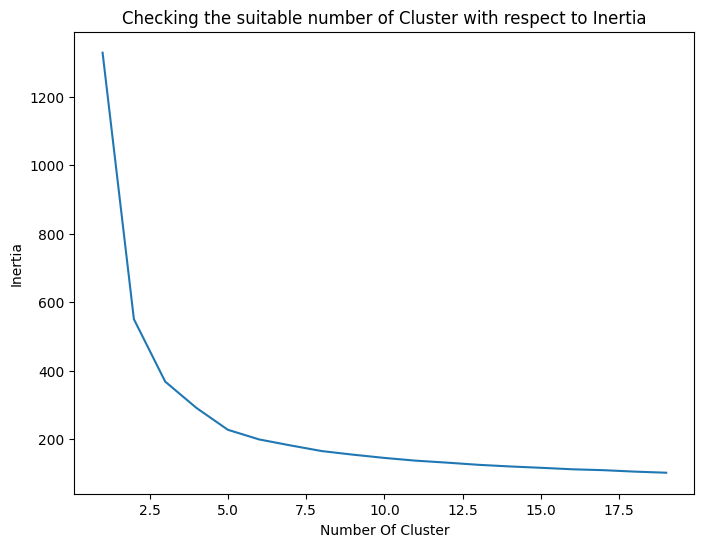

In [23]:
# Plot inertia and k_values to reach the optimum N of clusters

plt.figure(figsize=(8,6))
plt.plot(k_values, inertia)
plt.xlabel('Number Of Cluster')
plt.ylabel('Inertia')
plt.title('Checking the suitable number of Cluster with respect to Inertia')
plt.show()

In [25]:
# Choose an appropriate number of clusters
kmeans = KMeans(n_clusters=5)
penguins_df['cluster'] = kmeans.fit_predict(scaled_data)

c:\Users\Koko Ellally\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
## Droping non-numeric data so we can use "groupby" on data

penguins_df = penguins_df.drop('sex', axis=1)

In [30]:
# Group by the clusters and calculate the mean for each cluster
stat_penguins = penguins_df.groupby(penguins_df['cluster']).mean()

# Show the final DataFrame
print(stat_penguins)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               40.432203        19.301695         193.711864  4108.898305
1               45.522581        14.314516         212.935484  4699.596774
2               37.862921        17.600000         187.078652  3399.157303
3               49.216923        18.538462         196.830769  3778.461538
4               49.792982        15.738596         221.912281  5519.736842
